# A. Problem Statement

Bank ABC offers home loans. Customers apply for a loan and wait until it is approved successfully.
- The company wants to build a rapid appraisal model based on information provided by customers to save costs.
- The problem is to identify customer segments to speed up the company's workflow

It is a classification problem where we have to predict whether a loan would be approved or not. 
- Determine this is a binary classification problem: yes or no

Hypothesis before going to analyze:
- Financial ability: with the higher the income, the easier it is to repay the bank debt
- Previous loan history: applicants  who have paid their debts before are more likely to gain the trust of the bank
- Loan amount: the smaller the loan, the easier it is to get approved
- Loan term: Loan for less time period and less amount should have higher chances of approval.
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.


# B. Data analysis

## I. Import data

In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [708]:
data = pd.read_csv('https://raw.githubusercontent.com/dao-trung-hieu/practice_analysis/main/cvs_file/loan_data.csv')

In [709]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y


In [710]:
data.shape

(981, 13)

In [711]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- Variable Descriptions:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Yes/No)                        	|
| Dependents        	| Number of dependents(1,2,3+)                          	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Yes/No)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|


In [712]:
# drop the columns that are not needed, 'Loan_ID' 
data = data.drop(['Loan_ID'], axis=1)

## II. EDA, Exploratory Data Analysis

### Variable classification

- Categorical data: 
- - Norminal data: Gender, Married, Credit_History, Loan_Amount_Term, Loan_Status
- - Ordinal data:  Dependents, Education, Self_Employed, Property_Area
- Numerical data:
- - Countinous data: ApplicantIncome, CoapplicantIncome
- - Discrete data: LoanAmount

### Loan profile status

In [713]:
sns.set_style('darkgrid')

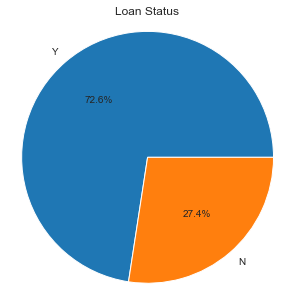

In [714]:
# Loan_Status is the target variable
Loan_Status = data['Loan_Status'].value_counts(normalize=True)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(Loan_Status, labels=Loan_Status.index, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Loan Status')
plt.show()

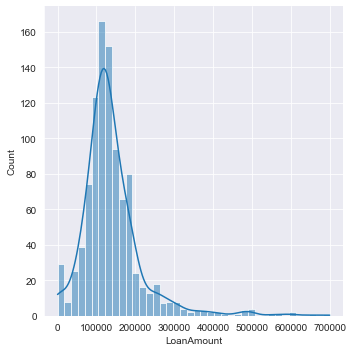

In [715]:
# Histogram of 'Loan_Amount'
sns.displot(data['LoanAmount'], bins=40,kde=True)
plt.show()

- Loan Approval Status: About 2/3rd of applicants have been granted loan.
- Loan Amount: the data is skewed towards one side.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

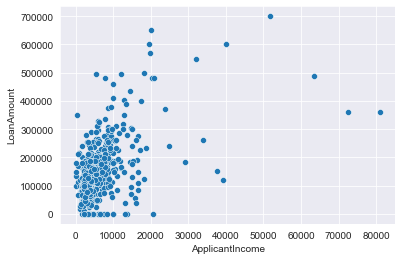

In [716]:
sns.scatterplot(data=data, x='ApplicantIncome', y='LoanAmount')

### Who need a loan?

In [717]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

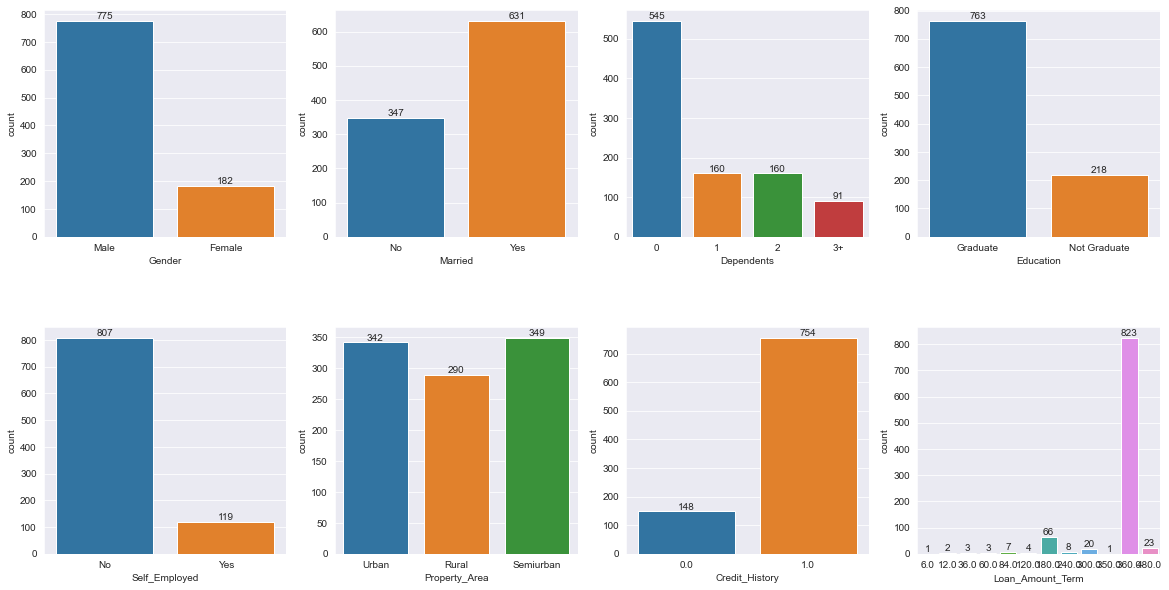

In [718]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
for idx,column in enumerate(categorical_columns):
    row,col = idx//4, idx%4
    ax = sns.countplot(x=column, data=data, ax=axs[row,col])
    ax.bar_label(ax.containers[0])
plt.subplots_adjust(hspace=0.4, wspace=0.2)

Who needs a loan? It's:
- Sex: Man are more than Women
- Martial Status: Married applicants are more likely to be granted loans.
- Dependents: Majority of the population have zero dependents and are also likely to be accepted for loan.
- Education: The population is Graduate and have higher propotion of loan approval
- Employment: It seems that self-employed people need a loan
- Property Area: More applicants from Semi-urban and also likely to be granted loans
- Credit History: Applicant with credit history are far more likely to be accepted
- Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

### Is "who are you" the deciding factor?

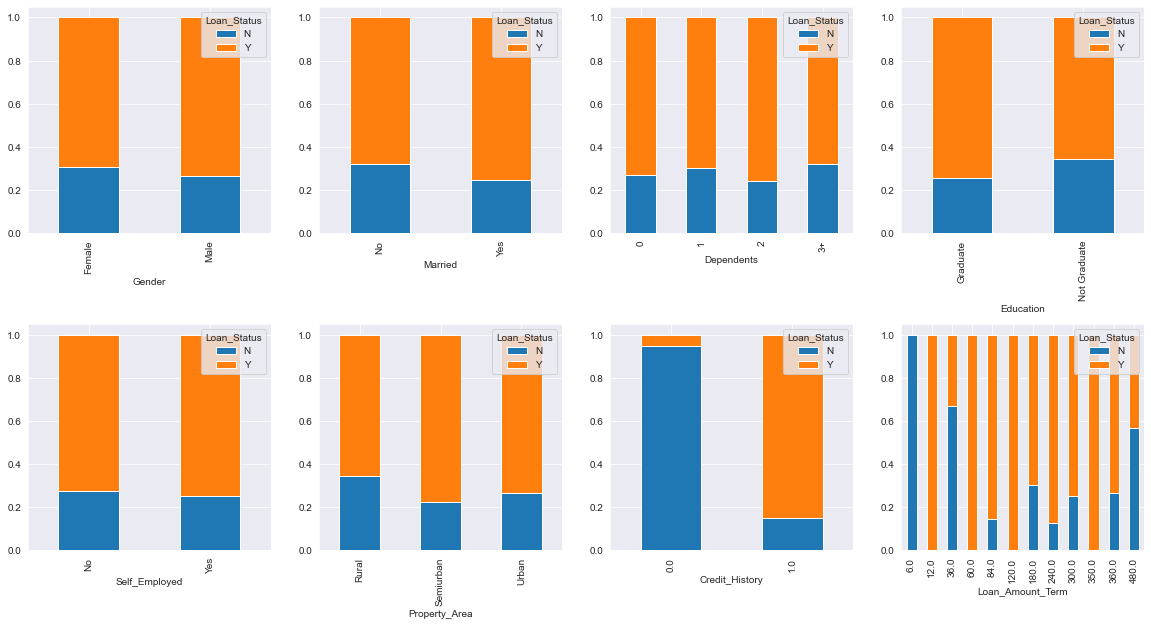

In [719]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
for idx,column in enumerate(categorical_columns):
    row,col = idx//4, idx%4
    df = pd.crosstab(data[column], data['Loan_Status'])
    df.div(df.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[row,col])
plt.subplots_adjust(hspace=0.4, wspace=0.2)    

There are 2 factors that strongly influence the loan approval: Credit History and Loan Amount Term
- Credit History: Having a credit history is a plus
- Loan Amount Term: Most applications for a long term loan of 360 months are approved successfully

### Financial ability

In [720]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
data[numerical_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,138589.194699
std,5695.104533,2718.772806,79831.886151
min,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,99000.000000
50%,3800.000000,1110.000000,125000.000000
75%,5516.000000,2365.000000,160000.000000
max,81000.000000,41667.000000,700000.000000


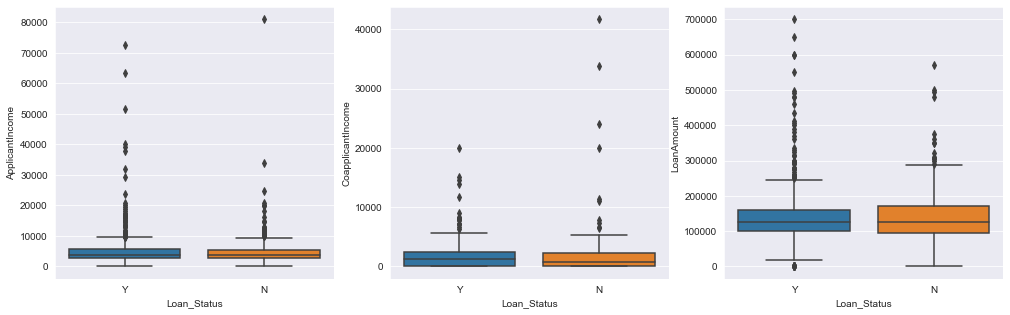

In [721]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

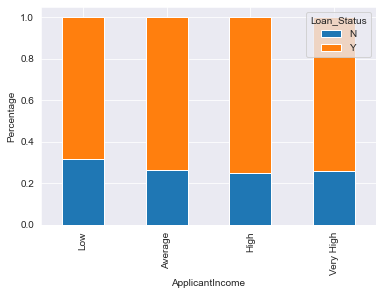

In [722]:
# Considering the applicant's income, divide it 
bins=[0,2900,3800,5500,81000] 
group=['Low','Average','High','Very High']
Income_bin = pd.cut(data['ApplicantIncome'], bins,labels=group)
Income_bin = pd.crosstab(Income_bin,data['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

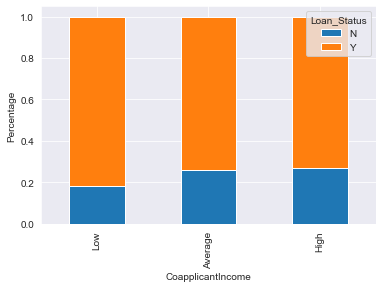

In [723]:
# By the total income of the co-applicant
bins=[0,1100,2500,42000]
group=['Low','Average','High']
Coapplicant_Income_bin = pd.cut(data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(Coapplicant_Income_bin,data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

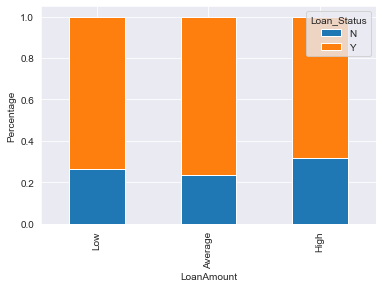

In [724]:
# by the loan amount
bins=[0,100000,150000,700000] 
group=['Low','Average','High'] 
LoanAmount_bin = pd.cut(data['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(LoanAmount_bin,data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

- It can be seen that the 3 factors: applicant's income, co-applicant, loan amount do not affect too much the chances of getting a loan approved.
- This seems to contradict the original hypothesis.

### Correlation

In [725]:
correlation_data = data.corr()

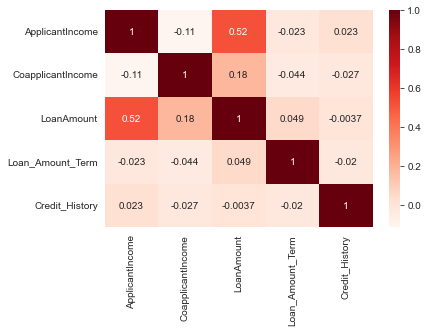

In [726]:
sns.heatmap(correlation_data, annot=True, cmap=plt.cm.Reds)
plt.show()

There is a positive correlation between ApplicantIncome and LoanAmount

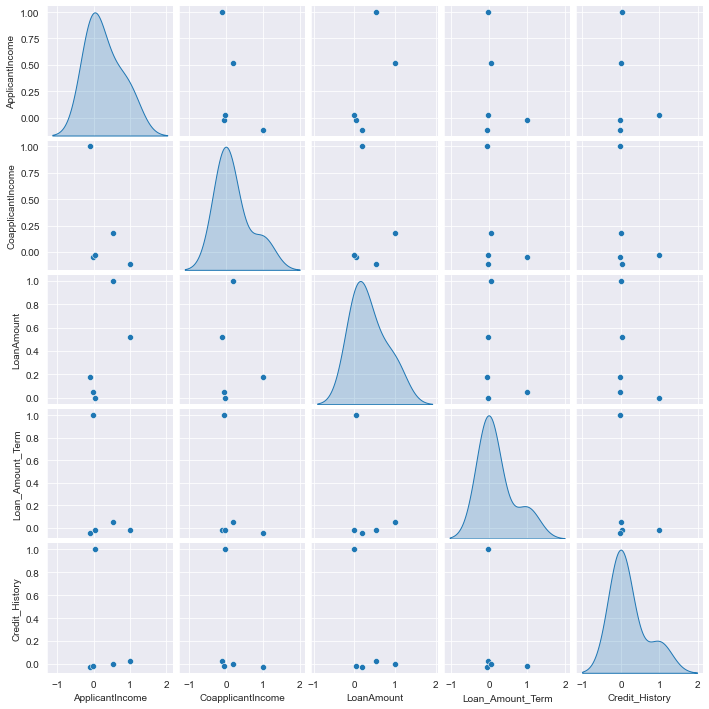

In [727]:
sns.pairplot(correlation_data, diag_kind="kde", size=2)
plt.show()

## III. Data processing

### Missing value

In [728]:
data.isna().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [729]:
# handle missing values
# categorical data, ordinal data, fill with mode
data.Gender.fillna(data.Gender.mode()[0], inplace= True)
data.Married.fillna(data.Married.mode()[0], inplace= True)
data.Dependents.fillna(data.Dependents.mode()[0], inplace= True)
data.Self_Employed.fillna(data.Self_Employed.mode()[0], inplace= True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0], inplace= True)
data.Credit_History.fillna(data.Credit_History.mode()[0], inplace= True)
# numerical data, continuous data, fill with median
data.LoanAmount.fillna(data.LoanAmount.median(), inplace= True)
# median is better than mean in this data as the data is skewed towards one side that was visualized earlier

### Feature engineering

In [730]:
# Create a new column for TotalIncome
# Total Income: combine the applicant income and co-applicant income. If the total income is high, chances of loan approval might also be high.
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [731]:
# EMI, Equated monthly installments to be paid back
# Monthly Installment: estimate the monthly payment that the borrower has to make towards the loan.
# That people who have high EMI's might find difficult to pay back the loan. We can calculate the EMI by taking ratio of the loan amount with respect to the loan amount term.
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']

In [732]:
data[['TotalIncome','EMI']].describe()

,TotalIncome,EMI
count,981.000000,981.000000
mean,6781.711437,479.753046
std,6023.952550,946.836323
min,1442.000000,0.000000
25%,4166.000000,277.777778
50%,5314.000000,361.111111
75%,7308.000000,494.444444
max,81000.000000,21666.666667


In [733]:
# Drop the columns which are not required, they are have high correlation with the new feature TotalIncome, EMI
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [734]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data[['TotalIncome', 'EMI']])

In [735]:
# One Hot Encoding
data=pd.get_dummies(data,columns=["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"])

In [736]:
data.head()

,Loan_Status,TotalIncome,EMI,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Y,5849.0,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,N,6091.0,355.555556,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,Y,3000.0,183.333333,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,Y,4941.0,333.333333,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,Y,6000.0,391.666667,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1


## IV. Modeling

### Logistic Model

In [737]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [738]:
logreg = LogisticRegression()
X = data.drop(['Loan_Status'],axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [739]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (784, 19)
y_train.shape: (784,)
X_test.shape: (197, 19)
y_test.shape: (197,)


In [740]:
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [741]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy Score: 0.8578680203045685
Logistic Regression Confusion Matrix: 
 [[ 29  25]
 [  3 140]]


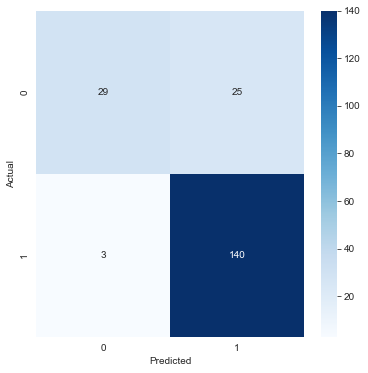

In [742]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=['0', '1'], yticklabels=['0', '1'],
            cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [743]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.91      0.54      0.67        54
           Y       0.85      0.98      0.91       143

    accuracy                           0.86       197
   macro avg       0.88      0.76      0.79       197
weighted avg       0.86      0.86      0.84       197



In [744]:
from sklearn.preprocessing import LabelEncoder
y_test_label = LabelEncoder().fit_transform(y_test)
y_pred_label = LabelEncoder().fit_transform(y_pred)

In [745]:
# Check the AUC score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_true=y_test_label, y_score=y_pred_label)
print("AUC :", auc_score)

AUC : 0.7580290080290081


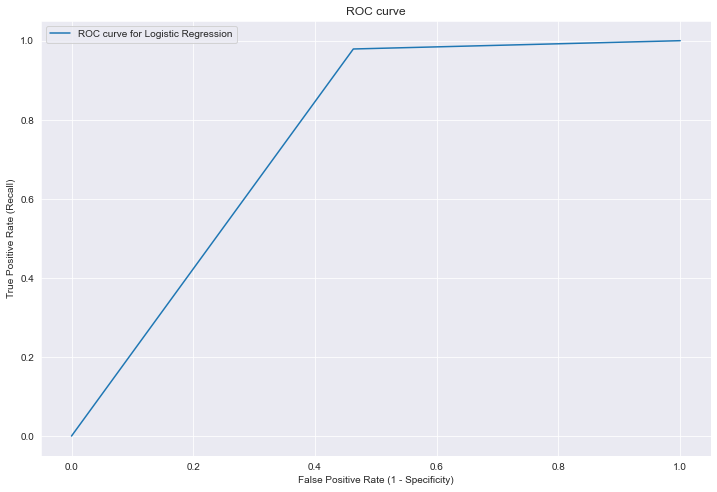

In [746]:
# Check the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_label, y_pred_label)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [747]:
# Weighted of features
print('intercept (w_0) =', logreg.intercept_)
print('weights   (w_1 to w_n):', logreg.coef_)

intercept (w_0) = [-0.13979879]
weights   (w_1 to w_n): [[-1.18011183e-05 -3.00942503e-05 -9.34194048e-02 -4.84052465e-02
  -3.07239624e-01  1.65414973e-01  6.87455500e-02 -3.20746164e-01
   7.44159881e-02  3.57599742e-02  1.18391309e-01 -2.60215961e-01
  -1.95910799e-01  5.40861471e-02 -2.32186543e+00  2.18004077e+00
  -5.73206221e-01  4.67220762e-01 -3.58391921e-02]]


In [748]:
weights_df = pd.DataFrame(
    data=logreg.coef_.T,
    columns=['weight'], 
    index=X.columns
).reset_index().rename(columns={'index':'feature_names'})

weights_df.head()

,feature_names,weight
0,TotalIncome,-0.000012
1,EMI,-0.000030
2,Gender_Female,-0.093419
3,Gender_Male,-0.048405
4,Married_No,-0.307240


In [749]:
weights_df['abs_weight'] = weights_df['weight'].abs()
weights_df = weights_df.sort_values(by='abs_weight', ascending=False)
weights_df.head(10)

,feature_names,weight,abs_weight
14,Credit_History_0.0,-2.321865,2.321865
15,Credit_History_1.0,2.180041,2.180041
16,Property_Area_Rural,-0.573206,0.573206
17,Property_Area_Semiurban,0.467221,0.467221
7,Dependents_1,-0.320746,0.320746
4,Married_No,-0.307240,0.307240
11,Education_Not Graduate,-0.260216,0.260216
12,Self_Employed_No,-0.195911,0.195911
5,Married_Yes,0.165415,0.165415
10,Education_Graduate,0.118391,0.118391


### Decision Tree

In [750]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini",random_state=10,max_depth=3,min_samples_leaf=5)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [751]:
print("Training Accuracy:{:.3f}".format(dtree.score(X_train,y_train)))
print('Testing Accuracy:{:.3f}'.format(dtree.score(X_test,y_test)))

Training Accuracy:0.867
Testing Accuracy:0.858


In [752]:
print(confusion_matrix(y_test, y_pred))

[[ 30  24]
 [  4 139]]


### Random Forest

In [753]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [754]:
print("Training Accuracy:{:.3f}".format(rfc.score(X_train,y_train)))
print('Testing Accuracy:{:.3f}'.format(rfc.score(X_test,y_test)))

Training Accuracy:1.000
Testing Accuracy:0.838


In [755]:
print(confusion_matrix(y_test, y_pred))

[[ 33  21]
 [ 11 132]]


## V. Conclusions

Through descriptive analysis, shows:
 - Customer's desired loan term is 360 months = 30 years
 - Nnumber 1: Credit History is extremely important, people with credit history will have easier access to loans
 - The second factor: Rural and semi-urban areas are the areas that are approved for a lot of loans
 - The financial situation is not as important as the assumption, instead the bank based on its credit history is probably safer
 - The next important factors: Dependen = 1, Married = No, Education = Not Graduate indicate these are young people

From the above factors, we can imagine a group of opponents with high demand for loans to buy houses:
 - Characteristics 1: rejuvenation
 - Characteristics 2: population movement: from rural, semi-urban to urban to buy house
 - Characteristics 3: inability to make large payments, want to extend the loan period
 - Characteristics 4: have a reliable credit history

# C. Some ideals

Suppose, a bank operating in the field of home loans, besides relying on the model built from the above data set to approve the loan, can also build some more policies based on the characteristics of the loan customer group:
- Designing product packages aimed at young people, low-income people, can be combined with government policies. For example, in Vietnam, the government has both a preferential loan policy for low-income people and a policy to encourage real estate businesses to build low-cost houses.
- The desired loan term is mostly very long, the bank can offer a reasonable and long-term interest rate to the customer, together with the customer, plan a suitable, solid, safe and sustainable repayment plan.

Note
- This is a small practice exercise with a set of hypothetical data, so there are definitely many shortcomings.
- Any suggestions are welcome
